In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import mglearn

In [5]:
from matplotlib import font_manager
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
# font_name = font_manager.FontProperties(fname="NanumBarunGothic.ttf").get_name()
plt.rc('font', family=font_name)
plt.rcParams["font.family"] = font_name
plt.rcParams['axes.unicode_minus'] = False

#### 실습문제01 : 정확도 vs. 비용
1. 3개의 PC를 사용하여 p128와 같은 3D 산점도를 그려보자.
2. 진단의료비를 줄이기 위해 어떤 변수(검사 항목)을 줄일 수 있는가? 모든 변수의 검사 비용이 동일하다고 가정하자.
3. 정확도를 높이기 위해 변수 등을 추가로 도입하여 2개의 PC로 산점도를 다시 그려보자.

In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)

# 평균 0, 분산 1을 갖도록 스케일 조정
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

from sklearn.decomposition import PCA
# 데이터의 처음 두 개 주성분만 유지시킵니다
pca = PCA(n_components=3) # 
# 유방암 데이터로 PCA 모델을 만듭니다
pca.fit(X_scaled)

# 처음 두 개의 주성분을 사용해 데이터를 변환합니다
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태: {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태: {}".format(str(X_pca.shape)))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 3)


#### 1. 3d 산점도

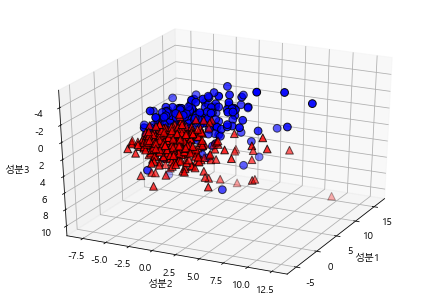

In [87]:
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)
# y == 0 인 포인트를 먼저 그리고 그 다음 y == 1 인 포인트를 그립니다
mask = cancer.target == 0
ax.scatter(X_pca[mask, 0], X_pca[mask, 1], X_pca[mask, 2], c='b', s=60, edgecolor='k')
ax.scatter(X_pca[~mask, 0], X_pca[~mask, 1], X_pca[~mask, 2], c='r', marker='^', s=60, edgecolor='k')

ax.set_xlabel("성분1")
ax.set_ylabel("성분2")
ax.set_zlabel("성분3")
plt.show()

#### 2. 변수 제거

#### 카이제곱 검정 사용
- box plot으로 분포 보기 : box 부분이 겹치는지 안겹치는지?, 어떻게 봄?...
- 변수 제거 하는 방법 다시 봅시당.

In [89]:
from scipy import stats

Text(0, 0.5, '주성분')

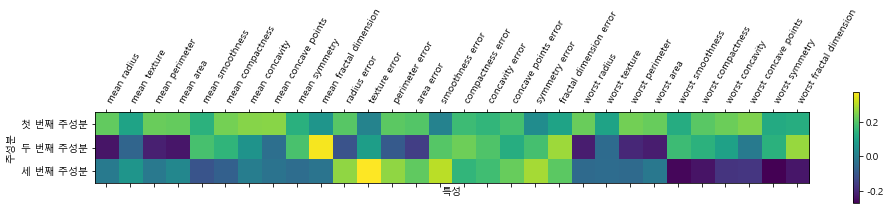

In [37]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1, 2], ["첫 번째 주성분", "두 번째 주성분", "세 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")